In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

df = pd.read_excel (r'D:\excelR\clustering\EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df2=df.drop(['ID#','Award?'], axis=1)

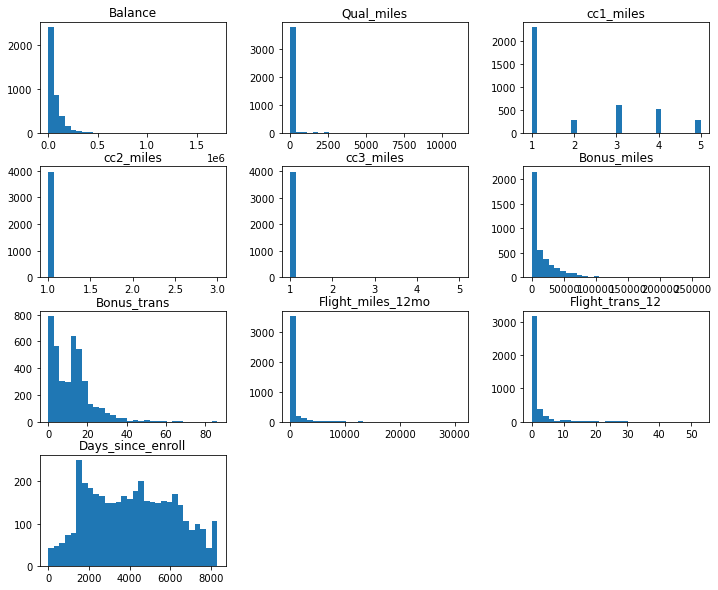

In [4]:
df2.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

In [5]:
from sklearn.preprocessing import normalize
df_norm = normalize(df2)

In [6]:
df_norm=pd.DataFrame(df_norm,columns=df2.columns)
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


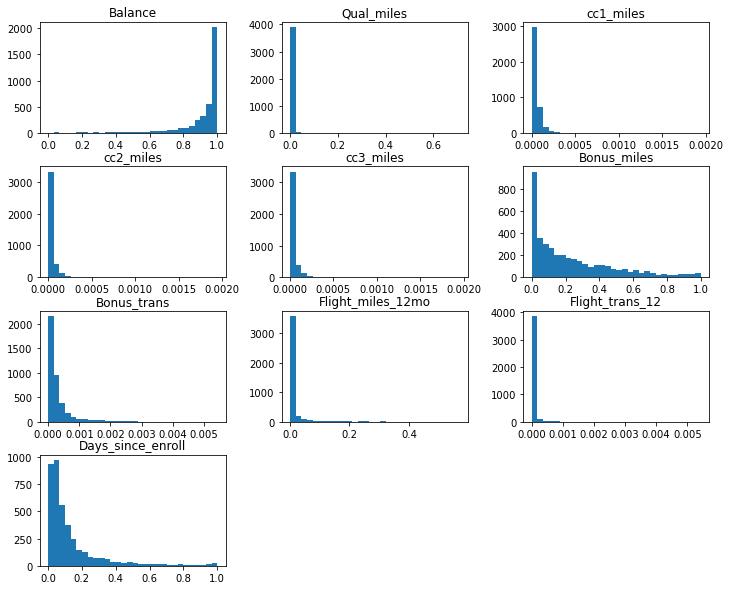

In [7]:
df_norm.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

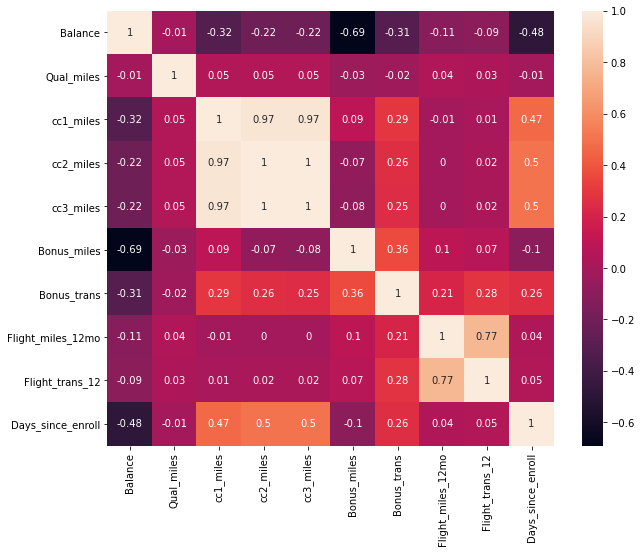

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_norm.corr().round(decimals=2), annot=True)
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca= PCA()
pca_values=pca.fit_transform(df_norm)
var = pca.explained_variance_ratio_
var

array([6.43191346e-01, 3.12357779e-01, 3.26694813e-02, 6.72131167e-03,
       5.05904409e-03, 8.34565363e-07, 1.59125161e-07, 4.20725581e-08,
       1.23631852e-09, 1.13358901e-10])

In [10]:
#cumlative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 64.32,  95.56,  98.83,  99.5 , 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01])

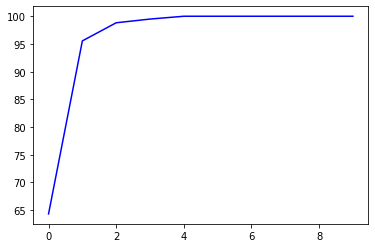

In [11]:
plt.plot(var1,color='blue')

In [12]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1', 'pc2'])],axis=1)
finaldf

,pc1,pc2
0,-0.224393,0.138451
1,-0.196079,0.234161
2,-0.159165,0.039845
3,-0.152854,0.314777
4,0.126842,-0.122741
...,...,...
3994,0.142170,-0.121368
3995,-0.250871,-0.065805
3996,0.040105,-0.150297
3997,-0.255563,-0.060412


# Hierarchical Clustering

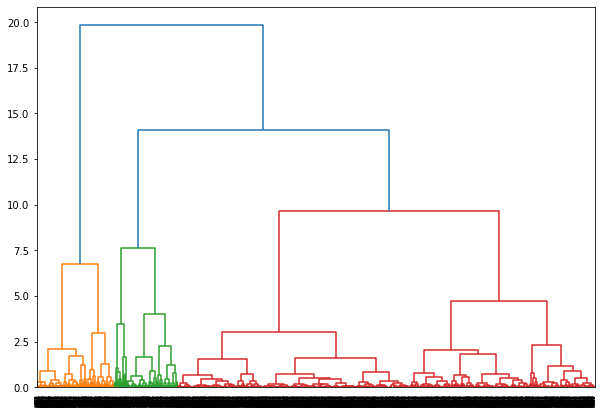

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(finaldf,'ward'))

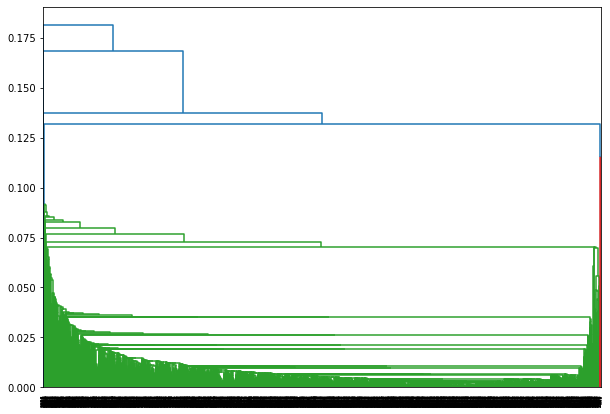

In [14]:
plt.figure(figsize=(10, 7))  
dendograms1=sch.dendrogram(sch.linkage(finaldf,'single'))

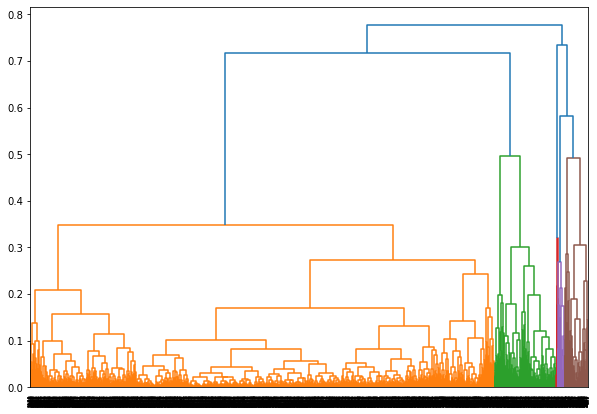

In [15]:
plt.figure(figsize=(10, 7))  
dendograms2=sch.dendrogram(sch.linkage(finaldf,'average'))

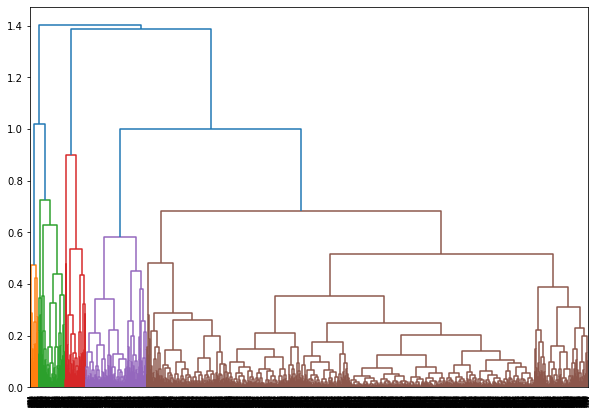

In [16]:
plt.figure(figsize=(10, 7))  
dendograms2=sch.dendrogram(sch.linkage(finaldf,'complete'))

In [31]:
#from above graphs, we will chose the one with 'ward' linkage for our final modelling as it has more clear visualisation as compared to others 
#determining the number of clusters by using silhouette score.
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for n_clusters in range(2,7):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(finaldf)   
    silhouette_avg = silhouette_score(finaldf, cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6997861590425876
For n_clusters = 3 The average silhouette_score is : 0.8189597868534986
For n_clusters = 4 The average silhouette_score is : 0.8521383335023489
For n_clusters = 5 The average silhouette_score is : 0.913869882614886
For n_clusters = 6 The average silhouette_score is : 0.8696082961408671


In [32]:
# From above results we can see that the silhouette score of n_clusters=5 is greater comparetively. Therefore we will chose 5 clusters for our final modelling
model1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
model3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model4 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')


#Predict and count numbers in each cluster
clus_solution1 = model1.fit_predict(finaldf)
clus_solution2 = model2.fit_predict(finaldf)
clus_solution3 = model3.fit_predict(finaldf)
clus_solution4 = model4.fit_predict(finaldf)

output1 = pd.DataFrame(data=clus_solution1)
output2 = pd.DataFrame(data=clus_solution2)
output3 = pd.DataFrame(data=clus_solution3)
output4 = pd.DataFrame(data=clus_solution4)

A=output1[0].value_counts(ascending=False)
B=output2[0].value_counts(ascending=False)
C=output3[0].value_counts(ascending=False)
D=output4[0].value_counts(ascending=False)

out=pd.concat([A,B,C,D], axis=1)
out.columns = ['ward', 'single', 'average', 'complete']
print(out)

   ward  single  average  complete
0   562      88       88        88
1   362     362      562       562
2  1326     562     1661      1661
3  1661    1661      362       362
4    88    1326     1326      1326


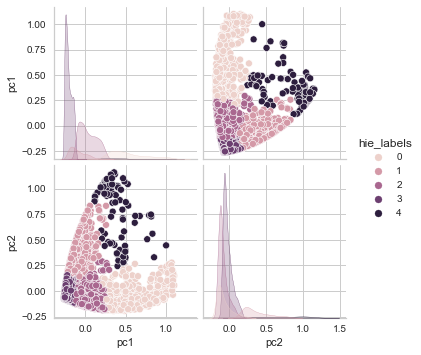

In [35]:
# since from above analysis we can see that model1 with 'ward' as linkage method shows well distributed clustering 
#therefore we will use model1 as our final clustering model 
model1.fit_predict(finaldf)
finaldf['hie_labels']=model1.labels_
g = sns.pairplot(finaldf, vars=['pc1','pc2'], hue="hie_labels", diag_kind="kde")

# K-Means

In [37]:
from sklearn.cluster import KMeans

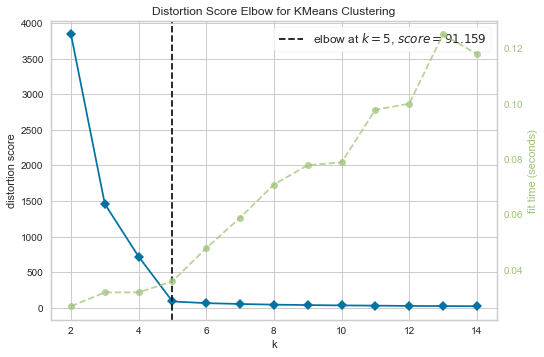

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
k=(2,15)
km = KMeans(n_clusters=k)    
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(finaldf)        # Fit the data to the visualizer
visualizer.show()

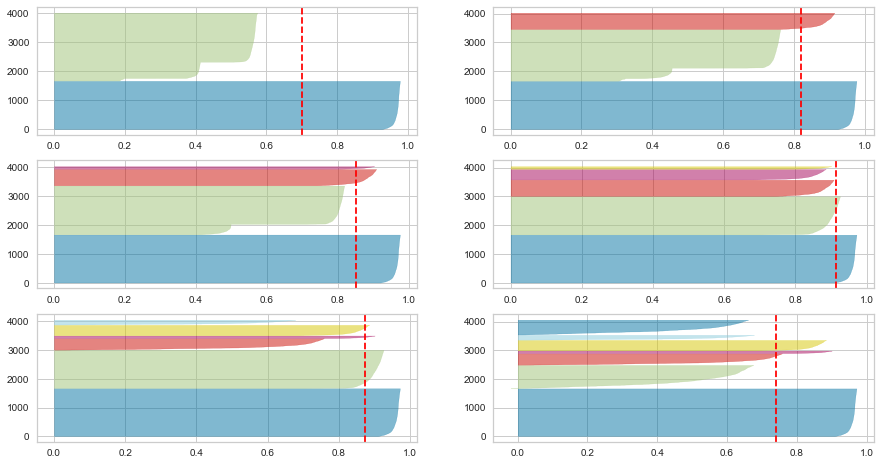

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(finaldf) 

Fig - Silhouette plots for n_clusters = 2 to n_clusters = 7. We can see that n_clusters=5 has the highest Silhouette score approx of 0.85 so choosing 5 clusters would be appropriate for the this clustering model

In [40]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(finaldf)
model1 = kmeanModel.predict(finaldf)

In [41]:
df3 = pd.DataFrame(data = model1)
df3[0].value_counts(ascending=False)

1    1661
0    1326
2     562
4     362
3      88
Name: 0, dtype: int64

In [42]:
finaldf['kmeanslabels']=kmeanModel.labels_
finaldf.head()

,pc1,pc2,hie_labels,kmeanslabels
0,-0.224393,0.138451,3,1
1,-0.196079,0.234161,1,4
2,-0.159165,0.039845,3,1
3,-0.152854,0.314777,1,4
4,0.126842,-0.122741,2,0


<Figure size 1440x1008 with 0 Axes>

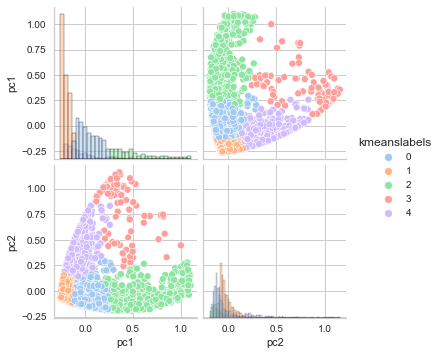

In [43]:
plt.figure(figsize=(20, 14))  
k = sns.pairplot(finaldf, vars=['pc1','pc2'], hue="kmeanslabels", diag_kind="hist",palette="pastel")

# DBSCAN

In [55]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(finaldf)
distances, indices = nbrs.kneighbors(finaldf)

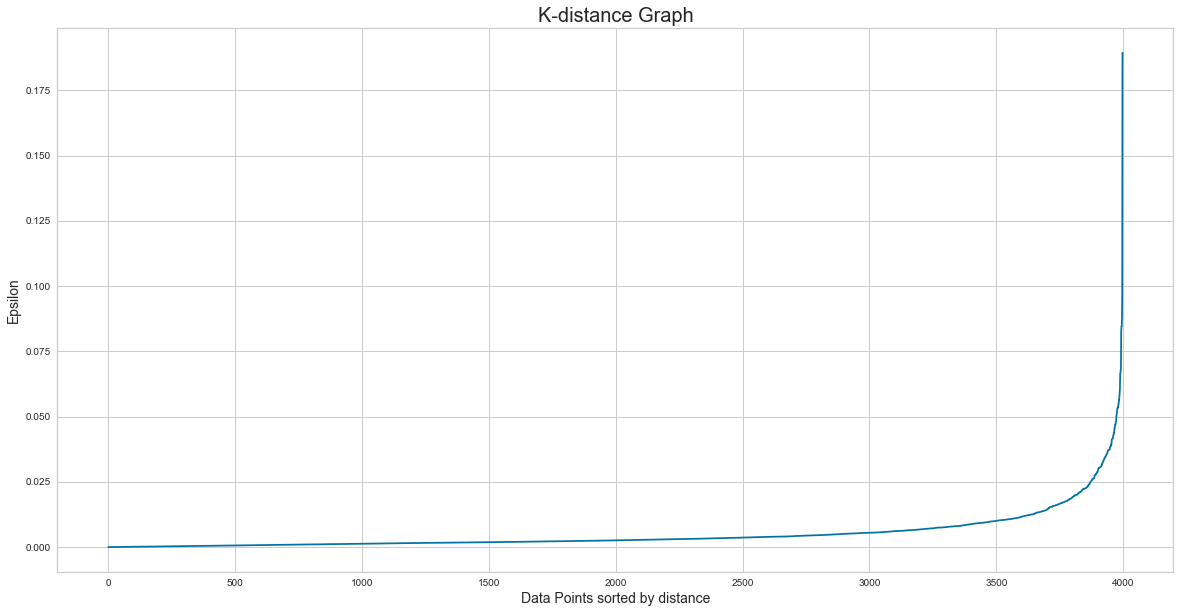

In [56]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [57]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.025,min_samples=24)
dbscan_opt.fit(finaldf)

DBSCAN(eps=0.025, min_samples=24)

In [62]:
finaldf['DBSCANlabels']=dbscan_opt.labels_
finaldf['DBSCANlabels'].value_counts()

 0    1630
 2    1124
-1    1062
 3      73
 1      73
 4      37
Name: DBSCANlabels, dtype: int64

<Figure size 1440x1008 with 0 Axes>

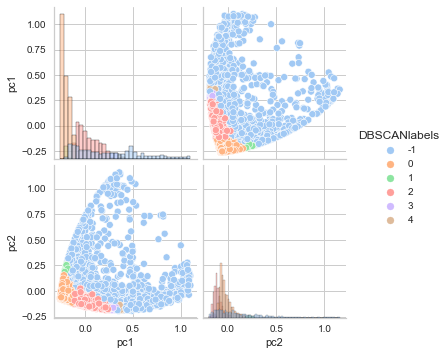

In [63]:
plt.figure(figsize=(20, 14))  
k = sns.pairplot(finaldf, vars=['pc1','pc2'], hue="DBSCANlabels", diag_kind="hist",palette="pastel")